## 5조 연기의 민족

#### 주제 : 청소년의 전자담배 구매 경로 파악 및 구매 접근 규제 강화 제안

##### - 전자담배에 대한 기호성 증가에 따라 청소년들 사이에서도 전자담배가 유행하고 있다고 함.
##### - 그렇다면 정말 청소년들이 전자담배를 접하고 있는지, 그리고 어떻게 그들이 전자담배를 구할 수 있는지를 살필 필요가 있을 것으로 보임.

##### 먼저 일반 담배의 흡연률 추이는 어떨까?

In [ ]:
# 패키지 설치
! pip install matplotlib
! pip install koreanize-matplotlib
! pip install pandas
! pip install konlpy
# 한글 폰트 설치
!apt-get update
!apt-get install fonts-nanum* -y

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.8/493.8 kB 29.5 MB/s eta 0:00:00
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illino

In [ ]:
# 먼저 경로 변경
import os

os.chdir("/content/drive/MyDrive/Colab Notebooks")

In [ ]:
# 일반담배와 전자담배흡연율 추이 불러오기
import pandas as pd

elect_data = pd.read_csv('액상형전자담배.csv', index_col=0).dropna().reset_index(drop=True)
nomal_data = pd.read_csv('일반담배.csv', index_col=0).dropna().reset_index(drop=True)
# 전체흡연율만 필요해서 슬라이싱함
nd = nomal_data.iloc[2][2:]
ed = elect_data.iloc[2][2:]

new_smoke = pd.concat([nd.astype(float),ed.astype(float)],axis=1) # 그래프 2개 합침
# 증감률 추이를 보여주기위해 diff, 그것을 누적으로 보여주기위해 cumsum사용
new_smoke = new_smoke.diff(axis=0).cumsum()

In [ ]:
nd

,2
2013,24.1
2014,24.2
2015,22.6
2016,23.9
2017,22.3
2018,22.4
2019,21.5
2020,20.6
2021,19.3
2022,17.7


2016년 이후로는 꾸준히 감소 추세를 그리고 있음을 확인할 수 있다.

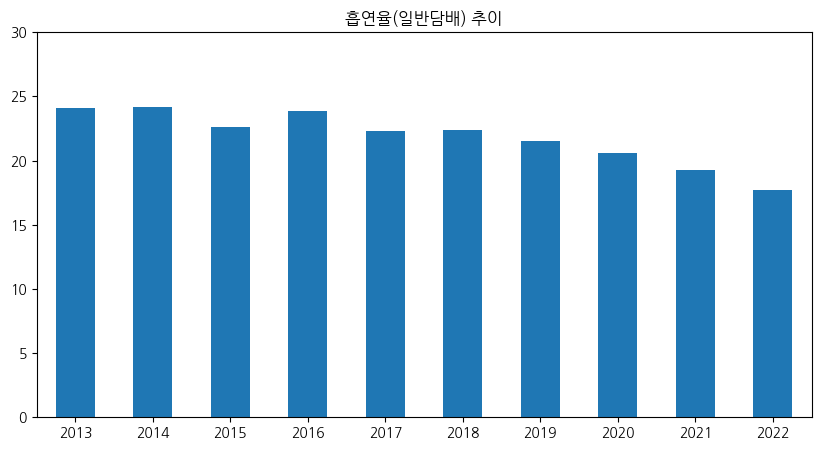

In [ ]:
# 일반 담배의 흡연율에 대한 추이 시각화
import matplotlib.pyplot as plt
import koreanize_matplotlib

nomal = pd.DataFrame(nd)
gr = nomal.astype(float).plot(kind='bar',figsize=[10,5]).get_legend().remove()
for i in range(len(nomal)):
  value = nomal.iloc[i,0]
plt.title('일반담배 흡연률 추이')
plt.xticks(rotation=0)
plt.yticks(range(0,31,5))
plt.show()

In [ ]:
# 평균 변화율 계산해보자

# 일단.. 두번째 행부터 float type으로 변경
sec_values = nomal_data.iloc[2, 3:].astype(float)

# 연도별 변화율 계산
change_rate = sec_values.pct_change()* 100    ## pct_change : 퍼센트 변화를 의미!

# 평균 변화율 계산
average_rate = change_rate.mean()

print(average_rate)

-3.7387783426607397


따라서 결과를 확인하면, 일반 담배의 경우, 평균적으로 약 -3.38% 변화한 것으로 보이므로, 감소하는 추세로 확인됨.

##### 그렇다면 전자 담배는?

In [ ]:
# 전자담배의 흡연율 증감 추이를 살펴보면,

ed

,2
2013,1.1
2014,2.4
2015,4.2
2016,2.3
2017,2.7
2018,4.3
2019,3.3
2020,3.2
2021,3.2
2022,3.5


들쭉날쭉하기는 하나, 처음 조사한 2013년 대비 2022년까지 증가 추세로 그려지는 것을 볼 수 있다.

In [ ]:
# 확실한 증가 추이를 보이기 위해 2014, 2017, 2020, 2022년도 데이터만 좀 뽑아오자

selected_years = ['2014', '2017', '2020', '2022']
result = ed.loc[selected_years]

result

,2
2014,2.4
2017,2.7
2020,3.2
2022,3.5


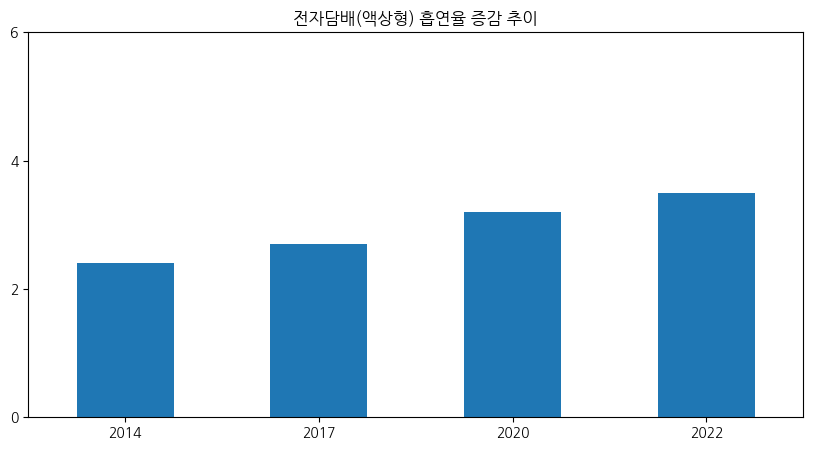

In [ ]:
# 추이에 대한 시각화

e_cigar = pd.DataFrame(result)
gr = e_cigar.astype(float).plot(kind='bar',figsize=[10,5]).get_legend().remove()
for i in range(len(nomal)):
  value = nomal.iloc[i,0]
plt.title('전자담배(액상형) 흡연율 증감 추이')
plt.xticks(rotation=0)
plt.yticks(range(0,8,2))
plt.show()

In [ ]:
# 마찬가지로 평균 변화율을 살펴보면,

# 일단.. 두번째 행부터 float type으로 변경
e_cigar_values = result.astype(float)

# 연도별 변화율 계산
change_rate_e = e_cigar_values.pct_change()* 100    ## pct_change : 퍼센트 변화를 의미!

# 평균 변화율 계산
average_rate_e = change_rate_e.mean()

print(average_rate)

13.464506172839512


결론적으로, 3개년 기준으로 평균 변화율이 약 13.47%로, 증가하는 추세임을 알 수 있다.

##### 두 그래프를 합쳐서 시각화해보면,

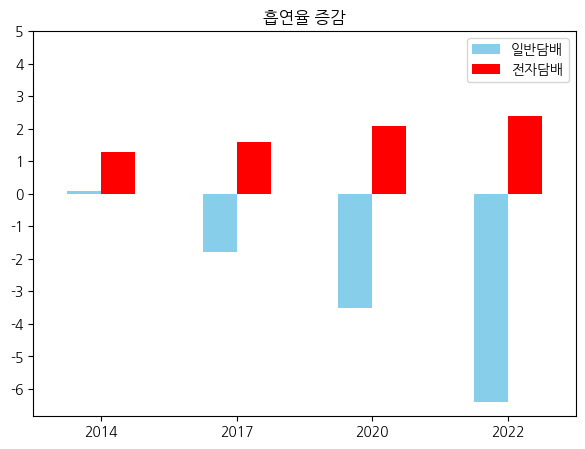

In [ ]:
# 일단 연도를 맞추고,
selected_years_2 = ['2013', '2014', '2017', '2020', '2022']
nd_2 = nd.loc[selected_years_2]
ed_2 = ed.loc[selected_years_2]

# 새로운 변수를 통해 그래프 2개를 합침
new_smoke = pd.concat([nd_2.astype(float), ed_2.astype(float)], axis = 1) # 오 엑셀 concat 같다

# 증감률 추이를 보여주기 위해 diff, 그것을 누적으로 보여주기 위해 cumsum 사용
new_smoke = new_smoke.diff(axis = 0).cumsum()
new_smoke = new_smoke.loc["2014":]        ## 2013은 빈 값이 될 것이므로

# 시각화
new_smoke.plot(kind='bar', color=['skyblue', 'red'],figsize=[7,5])
plt.title('흡연율 증감')
plt.legend(['일반담배', '전자담배'])
plt.xticks(rotation=0)
plt.yticks(range(-6,6))
plt.show()

따라서 일반 담배의 흡연률 추이와 전자 담배 흡연률 추이로 미루어보아 다음과 같은 결론을 얻을 수 있다.


- 일반 담배의 경우, 흡연율이 가파르게 하락하는 추세임.

- 기존의 일반 담배보다 전자담배의 인기가 높아지고 있으며, 그 과정에서 꽤 높은 성장세를 보이고 있다.

#### 그렇다면 정말 청소년과 전자담배가 많은 연관성을 가지고 있을까?

##### - 뉴스 기사를 통해 워드 클라우드로 살펴보기로 함.
##### - 1,847건의 뉴스를 바탕으로 워드 클라우드 생성
##### - 총 22 ~ 24년의 3개년 뉴스 데이터 바탕으로 생성

In [ ]:
# selenium 사용을 위한 패키지 설치
! pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.3/486.3 kB 20.7 MB/s eta 0:00:00


In [ ]:
# import 진행
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains

In [ ]:
# selenium을 통한 동적 웹 크롤링으로 기사 정보 가지고 오기
driver = webdriver.Chrome()
driver.maximize_window()
news_info = []
for i in range(2,5):
    url = f'https://search.naver.com/search.naver?where=news&query=%ED%9D%A1%EC%97%B0&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds=202{i}.01.01&de=202{i}.12.27&docid=&related=0&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so%3Ar%2Cp%3Afrom20231227to20241227&is_sug_officeid=0&office_category=0&service_area=0'
    driver.get(url)
    time.sleep(2)

    for _ in range(120):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(2)

    news_list = driver.find_elements(By.CSS_SELECTOR,'#main_pack > section > div.api_subject_bx > div.group_news > ul > li')


    for news in news_list:

        try:
            press,link = news.find_elements(By.CSS_SELECTOR,'div.info_group > a')
            title= news.find_element(By.CSS_SELECTOR,'div.news_contents > a:nth-child(2)')
            print(press.text, title.text,link.get_attribute('href'))
            news_dict = {
                'year' : f"202{i}",
                'name' : press.text,
                'link' : link.get_attribute('href'),
                'title' : title.text
            }
            news_info.append(news_dict)
        except:
            pass


SessionNotCreatedException: Message: session not created: Chrome failed to start: exited normally.
  (session not created: DevToolsActivePort file doesn't exist)
  (The process started from chrome location /root/.cache/selenium/chrome/linux64/131.0.6778.204/chrome is no longer running, so ChromeDriver is assuming that Chrome has crashed.)
Stacktrace:
#0 0x5bbea94978fa <unknown>
#1 0x5bbea8fa8d20 <unknown>
#2 0x5bbea8fe0438 <unknown>
#3 0x5bbea8fdbf96 <unknown>
#4 0x5bbea9027d86 <unknown>
#5 0x5bbea90273d6 <unknown>
#6 0x5bbea901b893 <unknown>
#7 0x5bbea8fea30d <unknown>
#8 0x5bbea8feb32e <unknown>
#9 0x5bbea946400b <unknown>
#10 0x5bbea9467f97 <unknown>
#11 0x5bbea945071c <unknown>
#12 0x5bbea9468b17 <unknown>
#13 0x5bbea94356cf <unknown>
#14 0x5bbea94866b8 <unknown>
#15 0x5bbea9486880 <unknown>
#16 0x5bbea9496776 <unknown>
#17 0x79cd9a1efac3 <unknown>


In [ ]:
# 판다스 활용, 크롤링 파일을 csv 파일로 변환
data = pd.DataFrame(news_info)

data.to_csv('네이버뉴스크롤링.csv')

In [ ]:
# 불러와서 확인
data = pd.read_csv("네이버뉴스크롤링.csv")

data.head()

,year,name,link,title
0,2022,중앙일보,https://n.news.naver.com/mnews/article/025/000...,코로나 이후 30대男 우울증 '경고등'...저학력·미혼·흡연자 위험
1,2022,연합뉴스,https://n.news.naver.com/mnews/article/001/001...,"인니, 새해부터 '가치담배' 판매 금지…청소년 흡연율 감축 목표"
2,2022,뉴스1,https://n.news.naver.com/mnews/article/421/000...,간접흡연 때리려는 '꽁초젖병 문 아기' 그림…'아동학대'라는데
3,2022,SBS언론사 선정,https://n.news.naver.com/mnews/article/055/000...,"'대마 유통 · 흡연' 남양유업 창업주 손자, 혐의 인정"
4,2022,헬스조선언론사 선정,https://n.news.naver.com/mnews/article/346/000...,"담배 때문에 뇌까지? 중년 흡연자, ‘이것’ 위험 높아"


In [ ]:
# 얼마나 검색되었을까?
data.value_counts("year")

,count
year,
2023,679
2024,598
2022,532


In [ ]:
# 문장별 형태소 분석

import re
from konlpy.tag import Okt

okt = Okt()

word_list = []
stopwords = ["유아인", "대마", "대마초", "남양유업", "혐의", "손자", "마약", "프로포폴", "투약", "징역"]            ### 흡연과 관계 없는 단어 제외

i = 0
for review in data["title"].tolist():
    print(f"탐색할 리뷰: {review}")
    new_review = re.sub("[^0-9a-zA-Z가-힣\\s+]", "", review)
    new_review_pos = okt.pos(new_review, norm=True, stem=True)
    print(f"pos 결과: {new_review_pos}")
    # 한 문장에 대한 반복문
    print(f"review에서 조건 만족하는 단어들: ", end="")
    noun_list = []
    verb_list = []
    adj_list = []
    for word, pos in new_review_pos:
        if len(word) == 1 or word in stopwords:
            continue
        if pos == "Noun":
            print(word, end=" ")
            noun_list.append(word)
        elif pos == "Verb":
            print(word, end=" ")
            verb_list.append(word)
        elif pos == "Adjective":
            print(word, end=" ")
            adj_list.append(word)
    sub_dict = {"Noun": " ".join(noun_list), "Verb": " ".join(verb_list), "Adjective": " ".join(adj_list)}          ### 명사, 동사, 형용사로 쪼개어 분석

    word_list.append(sub_dict)
    print()
    print("="*100)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
탐색할 리뷰: “모든 미디어에서 흡연 권유, 긍정적 표현 자제해야” 가이드라인 발표
pos 결과: [('모든', 'Noun'), ('미디어', 'Noun'), ('에서', 'Josa'), ('흡연', 'Noun'), ('권유', 'Noun'), ('긍정', 'Noun'), ('적', 'Suffix'), ('표현', 'Noun'), ('자제', 'Noun'), ('하다', 'Verb'), ('가이드라인', 'Noun'), ('발표', 'Noun')]
review에서 조건 만족하는 단어들: 모든 미디어 흡연 권유 긍정 표현 자제 하다 가이드라인 발표 
탐색할 리뷰: 차안에서 흡연도 계획이었다…휴게소 황당 택시 갈취사건
pos 결과: [('차안', 'Noun'), ('에서', 'Josa'), ('흡연', 'Noun'), ('도', 'Josa'), ('계획', 'Noun'), ('이다', 'Verb'), ('휴게소', 'Noun'), ('황당', 'Noun'), ('택시', 'Noun'), ('갈취', 'Noun'), ('사건', 'Noun')]
review에서 조건 만족하는 단어들: 차안 흡연 계획 이다 휴게소 황당 택시 갈취 사건 
탐색할 리뷰: 합성대마를 전자담배라며 고등학생에 흡연 강제 20대 실형
pos 결과: [('합성', 'Noun'), ('대마', 'Noun'), ('를', 'Josa'), ('전자담배', 'Noun'), ('라며', 'Noun'), ('고등학생', 'Noun'), ('에', 'Josa'), ('흡연', 'Noun'), ('강제', 'Noun'), ('20', 'Number'), ('대다', 'Verb'), ('실형', 'Noun')]
review에서 조건 만족하는 단어들: 합성 전자담배 라며 고등학생 흡연 강제 대다 실형 
탐색할 리뷰: "밖에서 흡연해주세요" 20대 女 맥주병으로 내려친 40대 男
pos 결과: [('밖', 'Noun'), ('에서', 'Josa'), (

In [ ]:
# 위의 형태소 분석을 기반으로 일단 데이터 프레임 만들기

new_data = pd.concat([data, pd.DataFrame(word_list)], axis=1)
new_data.head()

,year,name,link,title,Noun,Verb,Adjective
0,2022,중앙일보,https://n.news.naver.com/mnews/article/025/000...,코로나 이후 30대男 우울증 '경고등'...저학력·미혼·흡연자 위험,코로나 이후 우울증 고등 학력 미혼 흡연 위험,대다,
1,2022,연합뉴스,https://n.news.naver.com/mnews/article/001/001...,"인니, 새해부터 '가치담배' 판매 금지…청소년 흡연율 감축 목표",인니 새해 가치 담배 판매 금지 청소년 흡연 감축 목표,,
2,2022,뉴스1,https://n.news.naver.com/mnews/article/421/000...,간접흡연 때리려는 '꽁초젖병 문 아기' 그림…'아동학대'라는데,간접흡연 꽁초 젖병 아기 그림 아동학대,때리다,
3,2022,SBS언론사 선정,https://n.news.naver.com/mnews/article/055/000...,"'대마 유통 · 흡연' 남양유업 창업주 손자, 혐의 인정",유통 흡연 창업 인정,,
4,2022,헬스조선언론사 선정,https://n.news.naver.com/mnews/article/346/000...,"담배 때문에 뇌까지? 중년 흡연자, ‘이것’ 위험 높아",담배 때문 중년 흡연 위험,,높다


In [ ]:
# 전체를 보기 위하여 'total'이라는 새 coulmns 추가

new_data["total"] = new_data["Noun"] + " " + new_data["Verb"] + " " + new_data["Adjective"]
new_data

,year,name,link,title,Noun,Verb,Adjective,total
0,2022,중앙일보,https://n.news.naver.com/mnews/article/025/000...,코로나 이후 30대男 우울증 '경고등'...저학력·미혼·흡연자 위험,코로나 이후 우울증 고등 학력 미혼 흡연 위험,대다,,코로나 이후 우울증 고등 학력 미혼 흡연 위험 대다
1,2022,연합뉴스,https://n.news.naver.com/mnews/article/001/001...,"인니, 새해부터 '가치담배' 판매 금지…청소년 흡연율 감축 목표",인니 새해 가치 담배 판매 금지 청소년 흡연 감축 목표,,,인니 새해 가치 담배 판매 금지 청소년 흡연 감축 목표
2,2022,뉴스1,https://n.news.naver.com/mnews/article/421/000...,간접흡연 때리려는 '꽁초젖병 문 아기' 그림…'아동학대'라는데,간접흡연 꽁초 젖병 아기 그림 아동학대,때리다,,간접흡연 꽁초 젖병 아기 그림 아동학대 때리다
3,2022,SBS언론사 선정,https://n.news.naver.com/mnews/article/055/000...,"'대마 유통 · 흡연' 남양유업 창업주 손자, 혐의 인정",유통 흡연 창업 인정,,,유통 흡연 창업 인정
4,2022,헬스조선언론사 선정,https://n.news.naver.com/mnews/article/346/000...,"담배 때문에 뇌까지? 중년 흡연자, ‘이것’ 위험 높아",담배 때문 중년 흡연 위험,,높다,담배 때문 중년 흡연 위험 높다
...,...,...,...,...,...,...,...,...
1804,2024,전주MBC언론사 선정,https://n.news.naver.com/mnews/article/659/000...,청소년 식습관·정신건강 관리 필요.. 흡연·음주는 감소,청소년 습관 정신건강 관리 필요 흡연 음주 감소,,,청소년 습관 정신건강 관리 필요 흡연 음주 감소
1805,2024,뉴스1,https://n.news.naver.com/mnews/article/421/000...,"""담배 그만""…여주시보건소, 금연구역 내 흡연 집중 단속",담배 여주시 보건소 금연 구역 흡연 집중 단속,,,담배 여주시 보건소 금연 구역 흡연 집중 단속
1806,2024,SBS언론사 선정,https://n.news.naver.com/mnews/article/055/000...,'마약투약' 유아인 2심도 징역 4년 구형…내년 2월 선고,구형 내년 선고,심다,,구형 내년 선고 심다
1807,2024,매일경제언론사 선정,https://n.news.naver.com/mnews/article/009/000...,"“하루 담배 3갑, 수술 위해 배 열었더니”…유명 여배우의 충격적 과거",하루 담배 수술 위해 유명 여배우 충격 과거,열다,,하루 담배 수술 위해 유명 여배우 충격 과거 열다


In [ ]:
# 형태소 분석에 대해 따로 정리
new_data.to_csv('네이버뉴스크롤링_형태소분석.csv',index=False)

In [ ]:
# 내가 가지고 있는 폰트 목록 확인하기
from matplotlib import font_manager

search_font = "gothic"    # 필터

for font in font_manager.findSystemFonts():
  font_info = font_manager.FontProperties(fname=font)
  font_name = font_info.get_name()
  font_path = font_info.get_file()
  if search_font in font_name.lower():
    print(font_name, font_path)

NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf
NanumGothicCoding /usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf
NanumGothic Eco /usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumGothicCoding /usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf
NanumGothic Eco /usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumGothic Eco /usr/share/fonts/truetype/nanum/NanumGothicEcoR.ttf
NanumGothic Eco /usr/share/fonts/truetype/nanum/NanumGothicEco.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothicLight.ttf
NanumBarunGothic YetHangul /usr/share/fonts/truetype/nanum/NanumBarunGothic-YetHang

In [ ]:
# 폰트 등록하기
from matplotlib import font_manager

## 폰트 경로
font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf"
## 폰트 추가
font_manager.fontManager.addfont(font_path)
## 폰트 이름 확인
font_name = font_manager.FontProperties(fname=font_path).get_name()
print(font_name)

NanumBarunGothic


In [ ]:
import matplotlib.pyplot as plt     # 시각화를 위한 ㅎㅎ
# 폰트 설정하기
font_name = "NanumBarunGothic"
plt.rcParams["font.family"] = font_name

##### 본격 워드 클라우드

['코로나', '이후', '우울증', '고등', '학력', '미혼', '흡연', '위험', '인니', '새해', '가치', '담배', '판매', '금지', '청소년', '흡연', '감축', '목표', '간접흡연', '꽁초', '젖병', '아기', '그림', '아동학대', '유통', '흡연', '창업', '인정', '담배', '때문', '중년', '흡연', '위험', '옥주현', '실내', '흡연', '불좀', '깜짝', '담뱃갑', '경고', '그림', '흡연', '인권연대', '흡연', '혐오', '분위기', '조성', '김구라', '흡연', '음주', '이유', '황하나', '사촌', '유통', '흡연', '모두', '인정', '흡연', '훈계', '엄마뻘', '차기', '중학생', '경찰', '입건', '간접흡연', '기금', '흡연', '흡연', '구역', '분리', '스타킹', '담배', '심부름', '흡연', '청소년', '어른', '흡연', '황반변성', '고도', '근시', '망막박리', '주의', '헬스', '조선', '명의', '부어', '연말', '당신', '흡연', '강제', '중단', '뉴질랜드', '어기', '흡연', '훈계', '차기', '여성', '폭행', '중학생', '입건', '흡연', '치명', '전이', '위험성', '이상', '흡연', '여성', '피임', '경쟁', '흡연', '훈계', '폭행', '중학생', '덜미', '간접흡연', '흡연', '갈등', '전말', '금연', '아파트', '여성', '변회', '꽁초', '젖병', '담뱃갑', '경고', '그림', '사용', '중단', '건강', '연말', '술자리', '과음', '과식', '염증', '담뱃갑', '경고', '그림', '문구', '내일', '변경', '한파', '집콕', '흡연', '흡연', '고통', '차량', '사람', '곳곳', '흡연', '부산', '주차장', '불편', '호소', '음식', '오히려', '폐암', '위험', '경우', '건강', '

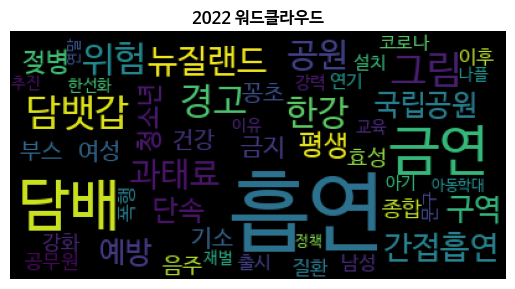

In [ ]:
# 연도별 워드 클라우드 그리기(명사), 22년 먼저
from collections import Counter
from wordcloud import WordCloud     # 워드 클라우드
import matplotlib.pyplot as plt     # 시각화

year = 2022

noun_list = []
for noun in new_data.loc[new_data["year"] == year, "Noun"]:
    noun_list.extend(noun.split(" "))
print(noun_list)

counter_22 = dict(Counter(noun_list).most_common(50))
wordcloud = WordCloud(
    font_path = "C:/Windows/Fonts/NanumBarunGothic.ttf"
).generate_from_frequencies(counter_22)

plt.imshow(wordcloud)
plt.title(f"{year} 워드클라우드")
plt.axis("off")
plt.show()

['걷기', '실천', '충남', '도민', '흡연', '증가', '음주', '흡연', '학교', '예방', '교육', '권익위', '권고', '흡연', '담배', '꽁초', '화재', '올해', '매일', '건꼴', '흡연', '음주', '충남', '도민', '지역', '사회', '건강', '조사', '결과', '실내', '흡연', '지적', '스무살', '맥주', '가격', '전치', '상습', '흡연', '구역', '등굣길', '주민', '유명', '흡연', '표현', '자제', '복지부', '미디어', '가이드라인', '흡연', '김예원', '녹색당', '대표', '개월', '구형', '흡연', '부탁', '격분', '맥주', '머리', '임산부', '감정노동자', '고도', '흡연', '맞춤', '금연', '상담', '지침', '발간', '코로나', '흡연', '음주', '비만', '우울', '증가', '당뇨병', '환자', '계속', '과식', '흡연', '생활', '습관', '개선', '일상', '회복', '비만', '우울', '음주', '흡연', '작년', '뇌경색', '환자', '흡연', '과음', '주의', '흡연', '구역', '민원', '이유지', '공범', '재미교포', '압수수색', '반발', '이의', '제기', '법원', '기각', '비밀', '흡연', '방송', '유튜버', '버스', '여중생', '흉기', '흡연', '걷기', '실천', '서울', '최고', '흡연', '음주', '세종', '제일', '흡연', '음주', '가장', '지역', '강원', '광주', '소식', '조선대', '병원', '지역', '금연', '지원', '센터', '지정', '세종', '시민', '현재', '흡연', '감소', '흡연', '절반', '금연', '시도', '비밀', '열차', '흡연', '방송', '유튜버', '청주', '소식', '가덕면', '행복', '센터', '주민', '휴식', '공간', '조성', '서대문구', '태양광', '가로

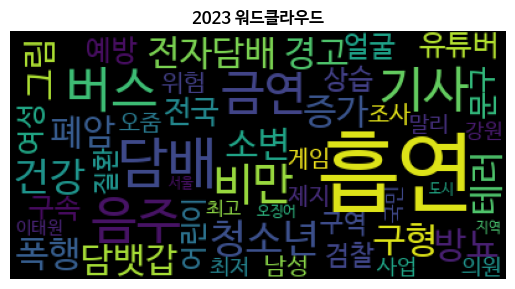

In [ ]:
# 연도별 워드 클라우드 그리기(명사) - 2023년
from collections import Counter
from wordcloud import WordCloud     # 워드 클라우드
import matplotlib.pyplot as plt     # 시각화

year = 2023

noun_list = []
for noun in new_data.loc[new_data["year"] == year, "Noun"]:
    noun_list.extend(noun.split(" "))
print(noun_list)

counter_23 = dict(Counter(noun_list).most_common(50))
wordcloud = WordCloud(
    font_path = "C:/Windows/Fonts/NanumBarunGothic.ttf"
).generate_from_frequencies(counter_22)

plt.imshow(wordcloud)
plt.title(f"{year} 워드클라우드")
plt.axis("off")
plt.show()

['대인', '기피', '병가', '송민호', '강원도', '파티', '음주', '흡연', '목격담', '음주', '흡연', '걷기', '실천', '충남', '도민', '건강', '지표', '개선', '충남도', '지역', '사회', '건강', '조사', '결과', '발표', '음주', '흡연', '도민', '버스', '흡연', '버스', '기사', '주먹', '구속', '송치', '전자담배', '흡연', '음주', '비만', '율도', '강원', '도민', '흡연', '위험', '음주', '전국', '흡연', '정선', '음주', '서울', '중랑구', '아침밥', '먹기', '부산', '올해', '전자담배', '흡연', '음주', '비만', '일제', '온몸', '소변', '냄새', '피해', '트라우마', '버스', '흡연', '폭행', '방뇨', '한블', '선배', '하늘', '무조건', '복종', '판결', '폭력조직', '행동강령', '실내', '흡연', '버스', '기사', '소변', '테러', '온몸', '냄새', '트라우마', '호소', '음주', '흡연', '사망률', '도우', '과거', '흡연', '발전', '소속사', '계약', '공식', '충북', '음주', '흡연', '심각', '단계', '전국', '두번째', '흡연', '해외', '도피', '유튜버', '징역형', '집행유예', '대구', '경북', '흡연', '음주', '비율', '대비', '감소', '흡연', '유튜버', '집행유예', '준법', '의식', '결여', '독해', '담뱃갑', '경고', '그림', '흡연', '증가', '잇슈', '워드', '위해', '상형', '전자담배', '담뱃세', '부과', '업계', '찬반', '전자담배', '흡연', '음주', '비만', '스트레스', '인지', '셀럽', '병사', '비밀', '오드리', '헵번', '대장암', '흡연', '때문', '수긍', '흡연', '말리', '버스', '기사', '얼굴', '오줌', '남성', 

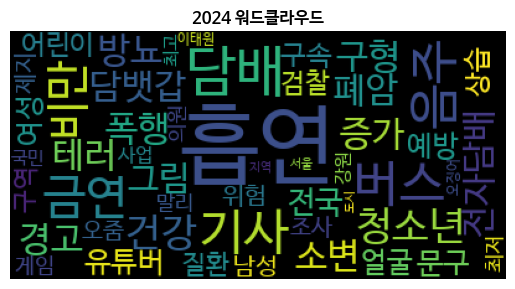

In [ ]:
# 연도별 워드 클라우드 그리기(명사) - 2024년
from collections import Counter
from wordcloud import WordCloud     # 워드 클라우드
import matplotlib.pyplot as plt     # 시각화

year = 2024

noun_list = []
for noun in new_data.loc[new_data["year"] == year, "Noun"]:
    noun_list.extend(noun.split(" "))
print(noun_list)

counter_24 = dict(Counter(noun_list).most_common(50))
wordcloud = WordCloud(
    font_path = "C:/Windows/Fonts/NanumBarunGothic.ttf"
).generate_from_frequencies(counter_22)

plt.imshow(wordcloud)
plt.title(f"{year} 워드클라우드")
plt.axis("off")
plt.show()

In [ ]:
# 위의 워드 클라우드에서 공통 명사를 추출

common_nouns = set(counter_22.keys()) & set(counter_23.keys()) & set(counter_24.keys())
common_nouns

{'건강',
 '구역',
 '금연',
 '남성',
 '담배',
 '비만',
 '사업',
 '상습',
 '예방',
 '위험',
 '음주',
 '증가',
 '청소년',
 '흡연'}

시사점 : 총 3개년의 데이터에서 청소년과 흡연이 꾸준하게 등장

- 이는 곧 청소년과 흡연이 계속해서 밀접한 관계에 놓여있었음을 확인할 수 있음.

### 그렇다면 청소년과 전자담배 사이의 연관성은?

- 위와 동일한 방법으로 분석
- 3년치 데이터에 대한 분석만 첨부함

In [ ]:
# 데이터 불러오기
data = pd.read_csv("네이버뉴스크롤링_전자담배_형태소분석.csv")

data

,year,name,link,title,Noun,Verb,Adjective,total
0,2022,연합뉴스언론사 선정,https://n.news.naver.com/mnews/article/001/001...,담뱃갑 경고그림 내일 교체…꽁초 든 젖병·담배연기가 된 얼굴,담뱃갑 경고 그림 내일 교체 꽁초 젖병 연기 얼굴,들다 되다,NaN,담뱃갑 경고 그림 내일 교체 꽁초 젖병 연기 얼굴 들다 되다
1,2022,헤럴드POP,https://m.entertain.naver.com/article/112/0003...,"이상준 ""탁재훈, 여학생에 5만원 지폐 다 꺼내 주며 전자담배 사 피우라...",이상준 탁재훈 여학생 지폐,꺼내다 주다 피우다,NaN,이상준 탁재훈 여학생 지폐 꺼내다 주다 피우다
2,2022,파이낸셜뉴스언론사 선정,https://n.news.naver.com/mnews/article/014/000...,"담배꽁초 젖병' 문 아기, 검게 타버린 생식기..담뱃갑 경고 더 끔찍해...",꽁초 젖병 아기 생식기 담뱃갑 경고,버리다,검다 끔찍하다,꽁초 젖병 아기 생식기 담뱃갑 경고 버리다 검다 끔찍하다
3,2022,이코노미스트언론사 선정,https://n.news.naver.com/mnews/article/243/000...,"“뉴질랜드 금연 법안 살펴라”…전자담배협회, 목소리 낸 까닭",뉴질랜드 금연 법안 협회 목소리 까닭,살피다 내다,NaN,뉴질랜드 금연 법안 협회 목소리 까닭 살피다 내다
4,2022,매일경제언론사 선정,https://n.news.naver.com/mnews/article/009/000...,"""가게서 안사요""… 온라인서 담배사는 청소년",가게 온라인 청소년,사다 살다,NaN,가게 온라인 청소년 사다 살다
...,...,...,...,...,...,...,...,...
1494,2024,NaN,NaN,NaN,포토 금연 흡연 일반 구역,나뉘다,멀다,포토 금연 흡연 일반 구역 나뉘다 멀다
1495,2024,NaN,NaN,NaN,하루 최대 흡입 공장 충격 테스트,NaN,NaN,하루 최대 흡입 공장 충격 테스트
1496,2024,NaN,NaN,NaN,공항 뻑뻑 중국인 영상 누리꾼,NaN,NaN,공항 뻑뻑 중국인 영상 누리꾼
1497,2024,NaN,NaN,NaN,투자 수출 호조 목표,NaN,NaN,투자 수출 호조 목표


['담뱃갑', '경고', '그림', '내일', '교체', '꽁초', '젖병', '연기', '얼굴', '들다', '되다', '', '이상준', '탁재훈', '여학생', '지폐', '꺼내다', '주다', '피우다', '', '꽁초', '젖병', '아기', '생식기', '담뱃갑', '경고', '버리다', '검다', '끔찍하다', '뉴질랜드', '금연', '법안', '협회', '목소리', '까닭', '살피다', '내다', '', '가게', '온라인', '청소년', '사다', '살다', '', '영아', '젖병담뱃갑', '그림', '내일', '', '강력하다', '뉴질랜드', '산다', '어기', '벌금', '', '영원하다', '뉴질랜드', '청소년', '구입', '영구', '금지', '채택', '', '', '기기', '신제품', '경쟁', '하이퍼', '출시', '내년', '', '치열하다', '미성년', '대리', '판매', '미성년', '노리다', '', '순간', '열풍', '고급', '라이터', '이기다', '', '하카', '코리아', '하카', '전용', '비비드', '그린', '출시', '예정', '', '', '궐련', '에이', '전국', '판매', '확대', '', '', '효자', '긴축', '한파', '최대', '실적', '뚫다', '끌다', '내다', '', '지구촌', '돋보기', '평생', '금지', '뉴질랜드', '금연', '실험', '', '성공하다', '뉴질랜드', '강력', '금연', '이하', '평생', '사다', '', '일본', '방위', '증액', '재원', '법인', '부흥', '활용', '추진', '', '', '필립모리스', '박빙', '놓다', '', '연기', '미래', '한국', '필립모리스', '포터', '연속', '꿈꾸다', '없다', '치아', '연구', '', '좋다', '곳도', '썩다', '만들다', '', '청소년', '중독', '미국', '소송', '합의', '종결', '', '', '미국', '브

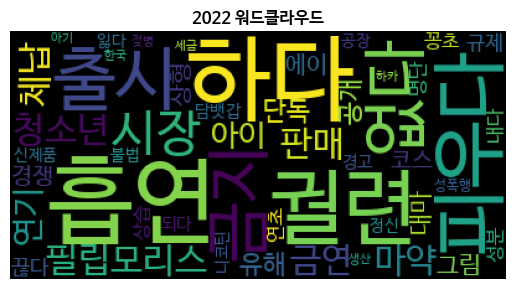

In [ ]:
# 연도별 워드 클라우드 그리기(전체) - 2022년

year = 2022

noun_list = []
for noun in data.loc[data["year"] == year, "total"]:
    noun_list.extend(noun.split(" "))
print(noun_list)

counter_22 = dict(Counter(noun_list).most_common(50))
wordcloud = WordCloud(
    font_path = "C:/Windows/Fonts/NanumBarunGothic.ttf"
).generate_from_frequencies(counter_22)

plt.imshow(wordcloud)
plt.title(f"{year} 워드클라우드")
plt.axis("off")
plt.show()

['여고생', '요구', '스타킹', '양말', '달라', '줄다', '대다', '신다', '신기루', '방송', '때문', '시아버지', '당포', '피우다', '들키다', '짜다', '엑소', '디오', '실내', '흡연', '과태료', '처분', '준수', '다짐', '성실하다', '제시', '난자', '냉동', '계획', '끊다', '이후', '출생', '평생', '강수', '계획', '발표', '흡연', '청년', '세대', '판매', '금지', '추진', '흡연', '매년', '필요', '며느리', '신기루', '시아버지', '피우다', '듣다', '사주다', '이후', '출생', '평생', '산다', '강수', '나라', '어디', '두다', '네일', '개미', '주목', '자다', '나가다', '제시', '냉동', '난자', '계획', '폭탄고백', '핑계', '끊다', '낳다', '내년', '익명', '출산', '보호', '출산', '성분', '공개', '국회', '통과', '영국', '국가', '추진', '이하', '평생', '산다', '놓다', '구입', '원천', '봉쇄', '법안', '추진', '전자기기', '신분증', '수험표', '수능', '놓다', '가다', '가져가다', '궐련', '부진', '선방', '영업', '줄다', '코로나', '음주', '흡연', '증가', '우울', '스트레스', '끝나다', '청소년', '성인', '나이', '제한', '올린다', '돼다', '사다', '임영웅', '최현욱', '길거리', '흡연', '모자라', '꽁초', '무단', '투기', '이다', '영국', '정부', '미래세', '금지법', '추진', '흡연', '세대', '나오다', '영국', '흡연', '세대', '성인', '만들다', '돼다', '영국', '수낵', '총리', '이하', '성인', '돼다', '사다', '되다', '수능', '전자기기', '가지', '자칫', '시계', '아날로그', '있다', '영국', '구입', '세

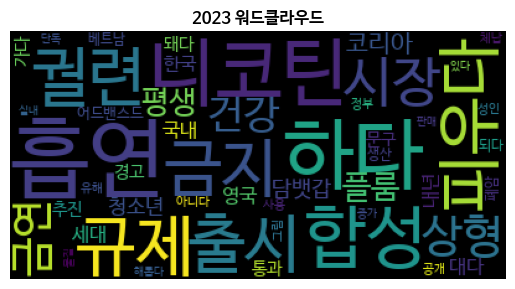

In [ ]:
# 연도별 워드 클라우드 그리기(전체) - 2023년

year = 2023

noun_list = []
for noun in data.loc[data["year"] == year, "total"]:
    if isinstance(noun, str):
      noun_list.extend(noun.split())
print(noun_list)

counter_23 = dict(Counter(noun_list).most_common(50))
wordcloud = WordCloud(
    font_path = "C:/Windows/Fonts/NanumBarunGothic.ttf"
).generate_from_frequencies(counter_23)

plt.imshow(wordcloud)
plt.title(f"{year} 워드클라우드")
plt.axis("off")
plt.show()

['회사', '쥴랩스', '미국', '소송', '합의', '종결', '클릭', '종목', '환율', '효과', '목표', '사로자다', '담뱃갑', '경고', '그림', '문구', '내일', '변경', '끔찍하다', '오늘', '담뱃갑', '경고', '그림', '세다', '바뀌다', '보다', '어떻다', '꽁초', '젖병', '아기', '담뱃갑', '경고', '그림', '내일', '바뀌다', '담뱃갑', '경고', '그림', '변경', '비용', '효과', '정책', '높다', '꽁초', '젖병', '담뱃갑', '경고', '그림', '들다', '독하다', '꽁초', '젖병', '아기', '내일', '담뱃갑', '있다', '강렬하다', '꽁초', '젖병', '아기', '담뱃갑', '그림', '가득하다', '강력하다', '선두', '라운드', '관전', '포인트', '바뀌다', '지방세', '체납', '불명예', '업자', '내다', '관세청', '정밀', '분석', '개발', '위장', '합성', '니코틴', '막다', '과반', '독주', '시작', '돼다', '라이프', '트렌드', '신뢰', '안해', '팩트', '보라', '유해', '물질', '배출', '되다', '수성', '자신', '매출', '비중', '궐련', '시장', '수성', '자신감', '에이', '직접', '보다', '비중', '확대', '해외진출', '신제품', '경쟁', '아이', '코스', '각축', '붙다', '경쟁', '시장', '에이블', '붙다', '굳히다', '체납', '갑부', '행안부', '공개', '담뱃갑', '그림', '문구', '강렬하다', '내년', '시나리오', '인삼공사', '상장', '임원', '스톡옵션', '고액', '세금', '체납', '미납', '판매', '차세대', '에이', '출시', '프리미엄', '제품', '할인', '신제품', '에이', '출시', '시대', '미납', '업자', '서울시', '세금', '체납', '태국', '청소년', '사용'

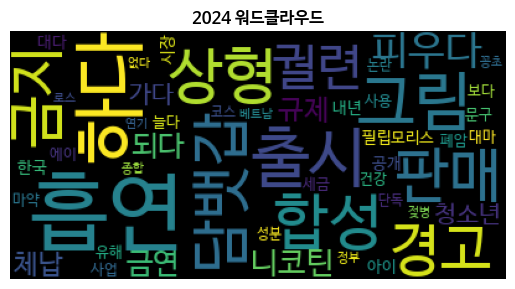

In [ ]:
# 연도별 워드 클라우드 그리기(전체)

year = 2024

noun_list = []
for noun in data.loc[data["year"] == year, "total"]:
    if isinstance(noun, str):
      noun_list.extend(noun.split())
print(noun_list)

counter_24 = dict(Counter(noun_list).most_common(50))
wordcloud = WordCloud(
    font_path = "C:/Windows/Fonts/NanumBarunGothic.ttf"
).generate_from_frequencies(counter_24)

plt.imshow(wordcloud)
plt.title(f"{year} 워드클라우드")
plt.axis("off")
plt.show()

In [ ]:
# 마찬가지로 공통 단어 뽑아보기

common_nouns = set(counter_22.keys()) & set(counter_23.keys()) & set(counter_24.keys())
common_nouns

{'경고',
 '공개',
 '궐련',
 '규제',
 '그림',
 '금연',
 '금지',
 '니코틴',
 '단독',
 '담뱃갑',
 '되다',
 '상형',
 '시장',
 '유해',
 '청소년',
 '체납',
 '출시',
 '판매',
 '피우다',
 '하다',
 '한국',
 '흡연'}

시사점 : 총 3개년의 데이터에서 청소년과 흡연이 꾸준하게 등장

- 이는 곧 청소년과 전자담배 역시 밀접한 관계에 놓여있었음을 확인할 수 있음.

### 그렇다면 네트워크를 분석해보자!

In [ ]:
! pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=389508de320b8f192706dd1bc7d9352a944086c373c317c9eddd45fb37571a35
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
from apyori import apriori
import itertools
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
# 데이터 불러오기

wc = pd.read_csv('keyword_전자담배.csv', index_col=0).dropna().reset_index(drop=True)
okt = Okt()
# desc = wc['description']
title = wc['title']
stopwords = ['대구시', '상형', '하중', '의원']          ### 쓸모없는 단어 방출 ㅎ

def divied(array):
    word_list = []
    for review in array.tolist():
        edit_review = re.sub('[^0-9a-zA-Z가-힣\\s+-]', '', review)
        edit_review_pos = okt.pos(edit_review)
        sub_list = []

        for word, pos in edit_review_pos:
            if len(word) < 2 or word in stopwords:
                continue
            elif pos =="Noun":
                sub_list.append(word)
        word_list.append(sub_list)
    return word_list

In [ ]:
nsize = None

def ori(array):
    # 연관된 단어들을 추출
    result = list(apriori(divied(array)))
    new_data = pd.DataFrame(result)
    return new_data.sort_values(by='support', ascending=False)

None


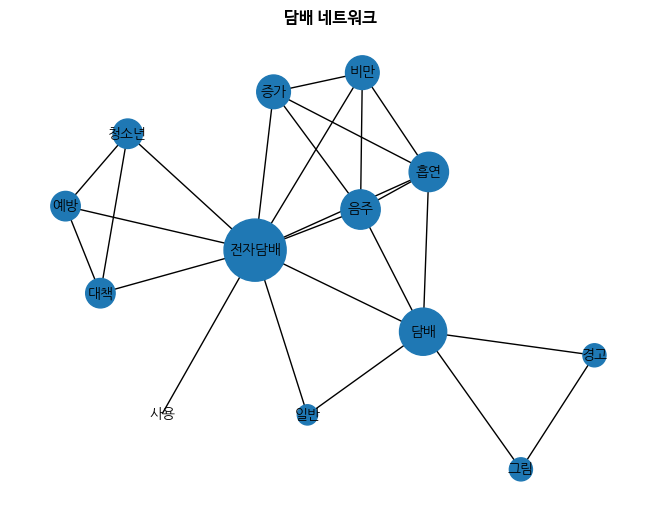

In [ ]:
def net(array):
    data = ori(array)  # 문제발생
    lengths = []

    for item in data['items'].tolist():  # item 항목이 2개 미만을 거르는 작업
        lengths.append(len(item))
    data['length'] = lengths
    new_data2 = data[data['length']>1]

    plt.rc('font', family = 'NanumBarunGothic')

    G = nx.Graph()
    word_combi = []
    for item in new_data2['items'].tolist(): #연관된 단어들을 2개씩 조합하여 리스트에 저장
        word_combi.extend(itertools.combinations(item, 2))
    G.add_edges_from(word_combi) # 네트워크 그래프에 간선을 추가

    pr = nx.pagerank(G) # pagerank를 사용하여 노드의 중요도를 계산하여 딕셔너리 형태로 저장
    nsize = np.array(list(pr.values()))
    nsize = 2000* (nsize - min(nsize)) / (max(nsize) - min(nsize)) # 노드 크기

    lay = nx.kamada_kawai_layout(G) # 노드간 간선을 시각적으로 균형있게 배치치
    nx.draw(G, lay, node_size = nsize, with_labels=True, font_size = 10, font_family = 'NanumGothic')
    plt.title('담배 네트워크')
    plt.show

    return None

print(net(title))

시사점 : 마찬가지로 청소년과 전자담배 사이의 연결성을 확인할 수 있음.

- 예방, 대책 등과도 연결되어 있는 것으로 보아, 청소년들의 전자담배 사용 문제점 등이 언급되고 있음도 알 수 있음

#### 그럼 청소년들은 도대체 어디서 전자담배를 구하고 있는가?

Text(0.5, 1.0, '전자담배 구매루트 추이')

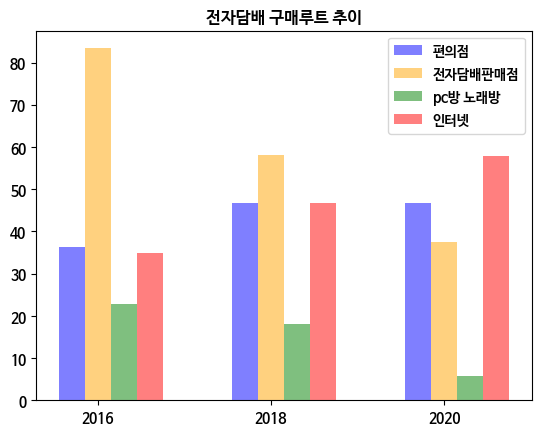

In [ ]:
# 연도별 구매루트 비율
route = pd.read_csv('전자담배구매루트.csv',index_col=0).dropna().reset_index(drop=True)
route.iloc[:,3][2]

# 루트별 구입비중 구하기기
df = []
for i in range(len(route.columns)):
    if route.iloc[:,i][2] == "구입한 적 있음":
        df.append(route.iloc[:,i][0:4:3])
df = pd.DataFrame(df)


market = df.iloc[:,1][0::4].astype(float)
store = df.iloc[:,1][1::4].astype(float)
pc = df.iloc[:,1][2::4].astype(float)
internet = df.iloc[:,1][3::4].astype(float)

import numpy as np

arr = np.arange(2016,2021,2) # y축값 저장장
w = 0.3
plt.bar(arr-w,market,width=0.3, alpha=0.5, color='blue', label='편의점')
plt.bar(arr,store,width=0.3, alpha=0.5, color='orange', label='전자담배판매점')
plt.bar(arr+w,pc,width=0.3, alpha=0.5, color='green',label='pc방 노래방')
plt.bar(arr+w+w,internet,width=0.3, alpha=0.5, color='red', label='인터넷')
plt.xticks(range(2016,2021,2))
# plt.Subplots(figsize=[12,6])
plt.legend()
plt.title('전자담배 구매루트 추이')

시사점 1) 온라인을 통해 구매하는 청소년들이 많아짐을 확인할 수 있음.

시사점 2) 편의점이나 전자담배판매점에서 구하는, 오프라인에 대한 비율 역시 무시할 수 있는 수준은 아님

생각해볼 수 있는 문제 1)
요새 무인 판매점도 늘고 있던데, 이런 곳에는 접근이 더 쉽지 않을까?

생각해볼 수 있는 문제 2)
온라인으로 구매하는 방법이 쉬운 것인가? 왜 이렇게 많이 온라인으로 접근하는 것일까?

### 온라인 채널별로 전자담배 검색 시 나타나는 상품의 수는 얼마나 많을까?

In [ ]:
import numpy as np
import pandas as pd

data = pd.DataFrame({
    "온라인 쇼핑몰": ["네이버", "지마켓", "11번가", "옥션"],        ## 인터넷 쇼핑 대표 도메인으로 설정
    "검색 결과": [69833, 19745, 12687, 10432]                       ## 실제 검색되는 수를 바탕으로 만듦
})
data

,온라인 쇼핑몰,검색 결과
0,네이버,69833
1,지마켓,19745
2,11번가,12687
3,옥션,10432


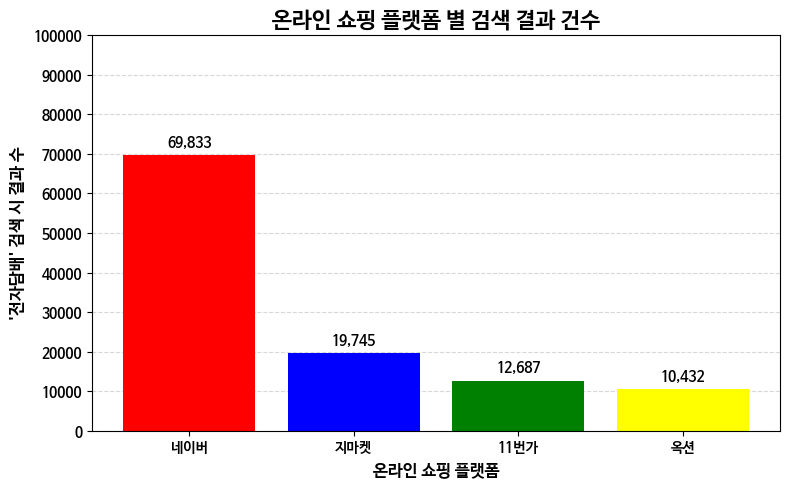

In [ ]:
# 위의 데이터프레임을 바탕으로 시각화 진행

fig, ax = plt.subplots(figsize=(8, 5))  # Axes 객체 생성
bars = ax.bar(data["온라인 쇼핑몰"], data["검색 결과"], zorder=2,color=['red','blue', 'green', 'yellow'])

#plt.figure(figsize=(8, 5))  # 차트 크기 설정
#plt.bar(data["온라인 쇼핑몰"], data["검색 결과"], zorder=2)

#격자 만들기
plt.grid(axis='y', linestyle='--', alpha=0.5, zorder=1)

# 라벨 달아주기
plt.title("온라인 쇼핑 플랫폼 별 검색 결과 건수", fontsize = 16)
plt.xlabel("온라인 쇼핑 플랫폼", fontsize = 12)
plt.ylabel("'전자담배' 검색 시 결과 수", fontsize = 12)

# Y축 값 표시
ax.bar_label(bars, labels=[f'{v:,}' for v in data["검색 결과"]], fontsize=10, padding=3)
plt.yticks(range(0,100001,10000))
plt.tight_layout()
plt.show()

#최종 업데이트 : 자료 기준 24.12.27 플랫폼 검색 기준 (중고, 해외, 렌탈 제외 )

시사점 : 온라인 쇼핑 플랫폼에서 상당한 양의 상품 등록글을 만날 수 있었음
- 특히 네이버의 경우, 다양한 상품을 모아놓았으면서도 가장 접근하기 쉬운 플랫폼임

생각해볼 문제 1) 만약 청소년들이 부모님 계정 등으로 접근이 가능하다면?
생각해볼 문제 2) 그렇다면 부모님 계정 등으로 결제를 할 수 있다면?
생각해볼 문제 3) 간편 결제 시스템을 통하여 결제까지 쉽게 도달할 수 있지 않을까?

## 서울시 내의 무인 전자담배 점포의 분포는 어떨까?

In [ ]:
# 동적 웹크롤링으로 무인 전자담배 위도, 경도값 get

# import 먼저
import pandas as pd
from io import StringIO
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import urllib
import os
from selenium.webdriver.common.keys import Keys

ModuleNotFoundError: No module named 'selenium'

In [ ]:
## 2. iframe으로 창이 되어 있는 것을 확인하여, 해당 URL로 이동이 필요함
frame_css = "#searchIframe"
frame_url = driver.find_element(By.CSS_SELECTOR, frame_css).get_attribute("src")

driver.get(frame_url)

In [ ]:
## 3. 목록 조회
shop_css = "#_pcmap_list_scroll_container > ul > li"
shop_list = driver.find_elements(By.CSS_SELECTOR, shop_css)

shop_list

In [ ]:
# 이름 찾기
name_css = "#_pcmap_list_scroll_container > ul > li:nth-child(1) > div.qbGlu > div.ouxiq > a:nth-child(1) > div > div > span.YwYLL"

name_factor = driver.find_element(By.CSS_SELECTOR, name_css).text

name_factor

In [ ]:
# 주소 찾기기
btn = driver.find_element(By.CSS_SELECTOR, "svg.Y2sSu")
btn.click()

In [ ]:
# 주소 저장
address_css = "#_pcmap_list_scroll_container > ul > li:nth-child(1) > div.qbGlu > div.ouxiq > div > div > div > div > div:nth-child(2)"
a = driver.find_element(By.CSS_SELECTOR, address_css).text


a.replace("지번", "").replace("복사", "")

In [ ]:
# 주소창 닫기
btn = driver.find_element(By.CSS_SELECTOR, "svg.Y2sSu")
btn.click()

In [ ]:
import time
# 1. URL 접속
driver = webdriver.Chrome()

keyword = "서울 무인전자담배"
url = f"https://map.naver.com/p/search/{urllib.parse.quote(keyword)}"
driver.get(url)                 # URL로 이동
driver.maximize_window()        # 열린 크롬창 최대화

## 2. iframe으로 창이 되어 있는 것을 확인하여, 해당 URL로 이동이 필요함

frame_css = "#searchIframe"
frame_url = driver.find_element(By.CSS_SELECTOR, frame_css).get_attribute("src")

driver.get(frame_url)
time.sleep(5)

In [ ]:
# scroll 전체 내리기
body = driver.find_element(By.TAG_NAME, "body")
body.click()
for i in range(7):
    body.send_keys(Keys.PAGE_DOWN)

## 3. 목록 조회
shop_css = "#_pcmap_list_scroll_container > ul > li"
shop_list = driver.find_elements(By.CSS_SELECTOR, shop_css)

# data를 저장할 리스트 만들기기
data = []

# 이름 찾기
for shop in shop_list:
    try:
        name_css = "div.qbGlu > div.ouxiq > a:nth-child(1) > div > div > span.YwYLL"

        name_factor = shop.find_element(By.CSS_SELECTOR, name_css).text
        # name_factor

        # 주소 찾기
        btn = shop.find_element(By.CSS_SELECTOR, "svg.Y2sSu")
        btn.click()

        # 주소 저장
        address_css = "div.qbGlu > div.ouxiq > div > div > div > div > div:nth-child(2)"
        address = shop.find_element(By.CSS_SELECTOR, address_css).text
        address = address.replace("지번", "").replace("복사", "")

        # 주소창 닫기
        btn = shop.find_element(By.CSS_SELECTOR, "svg.Y2sSu")
        btn.click()

        data.append({"가게 이름": name_factor, "주소": address})
    except: continue

df = pd.DataFrame(data)

In [ ]:
df.to_csv("전자담배_무인매장_좌표(진).csv")

- 폴리움으로 지도 상에 나타내기

In [1]:
import folium
import pandas as pd
m = folium.Map(location=[37.56421435,127.0016985], zoom_size=20)
m.save('map.html')

data = pd.read_csv("전자담배_무인매장_좌표(진).csv")
code = data[['위도', '경도']]
# print(len(code))
code
loc = []
for i in range(len(code)):
    loc.append(list(code.iloc[i]))
    folium.Marker(
        location=list(code.iloc[i]),
        icon=folium.Icon(color='red', icon = 'smoking', prefix="fa")
    ).add_to(m)

m

FileNotFoundError: [Errno 2] No such file or directory: '전자담배_무인매장_좌표(진).csv'

시사점 : 번화가 또는 학교 근처에서 볼 수 있어, 청소년들의 접근이 매우 쉬운 편

- 생각해볼 문제 1) 성인인증을 하게끔 되어 있는가?
- 생각해볼 문제 2) 성인인증 시, 도용 등으로 얻은 신분증으로 뚫을 수 있는가?
- 생각해볼 문제 3) 이러한 도용 등의 문제를 해결할만한 추가 보안 등의 인증절차가 있는가?